In [1]:

>>> import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/17-18-fall-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/17-18-fall-ta.xlsx") # TA preference list

In [3]:
n_rows, n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of course dataframe is
number of rows: 103, number of columns: 9


In [4]:
n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 288, number of columns: 11


## Brief preview of both TA and Course preference lists

In [5]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,10336.0,BIO 306,0,Microbiology,NaN,20.0,25.0,1-Yunus Akkoc ( 68906 ) (10 / 10)\n2-Sevde Nur...,"Yunus Akkoc (68906, BIO, 10 hours)\nBiran Musu..."
2,10338.0,BIO 321,0,Biochemistry I,NaN,30.0,25.0,1-Kurt Aricanli ( 68370 ) (20 / 20)\n1-Sevde N...,"Sevde Nur Karatas (68572, BIO, 20 hours)\nSine..."
3,10340.0,BIO 332,0,Cell Biology,NaN,30.0,25.0,2-Emir Artar ( 68152 ) (20 / 20)\n2-Sinem Uslu...,"Ronay Cetin (68888, BIO, 10 hours)\nMelike Gez..."
4,10342.0,BIO 407,0,Multicellular Organization,NaN,10.0,10.0,1-Melike Gezen ( 68726 ) (10 / 10)\n2-Yunus Ak...,"Halise Busra Cagirici (67918, BIO, 10 hours)"


In [6]:
TA_df.head(288 ) 

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,1- MATH 101 (260 / 430)\n2- ENS 204 (40 / 75)\...,ENS 204,10449.0,NaN,NaN
1,24375,Abdul Rahman \nDabbour,MS,ME,20,20,1- MATH 203 (100 / 300)\n2- NS 101 (265 / 370)...,MATH 203,10594.0,NaN,NaN
2,16440,Abdulkadir \nUzun,MS,EE,20,20,NaN,EE 409,10406.0,\nMATH 101,10857.0
3,14277,Abdurrahman \nBurak,MS,EE,10,10,1- EE 303 (15 / 15)\n2- EE 473 (10 / 15)\n3- E...,EE 303,10394.0,NaN,NaN
4,20205,Adnan \nTaşdemir,PHD,MAT,10,10,1- ENS 205 (210 / 150)\n2- MAT 312 (40 / 15)\n...,ENS 205,10430.0,NaN,NaN
5,22232,Afrim \nBojnik,MS,MATH,20,20,NaN,MATH 201,10571.0,NaN,NaN
6,21965,Ahmad Reza\nMotezakker,MS,ME,10,10,1- ENS 204 (40 / 75)\n2- ENS 207 (30 / 30)\n3-...,ENS 204,10449.0,NaN,NaN
7,13953,Ahmet Can\nMert,MS,EE,30,30,1- CS 303 (60 / 80)\n2- EE 401 (5 / 15)\n3- MA...,CS 303,10370.0,\nEE 401,10402.0
8,21969,Ahmet Deniz\nBenli,MS,MAT,20,20,NaN,MAT 408,10562.0,NaN,NaN
9,11990,Ahmet Mert\nBozkurt,PHD,PHYS,10,10,1- NS 213 (10 / 30)\n2- PHYS 303 (0 / 10),MATH 102,10892.0,NaN,NaN


## Data types for TA & Courses dataframes¶

In [7]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

In [8]:
TA_df.dtypes 

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

## Dealing with Dirty Data¶

In [9]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [10]:
TA_df.head(288)

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali Khalili Sadaghiani,PHD,ME,20,20,1- MATH 101 (260 / 430)\n2- ENS 204 (40 / 75)\...,ENS 204,10449,0,0
1,24375,Abdul Rahman Dabbour,MS,ME,20,20,1- MATH 203 (100 / 300)\n2- NS 101 (265 / 370)...,MATH 203,10594,0,0
2,16440,Abdulkadir Uzun,MS,EE,20,20,0,EE 409,10406,MATH 101,10857
3,14277,Abdurrahman Burak,MS,EE,10,10,1- EE 303 (15 / 15)\n2- EE 473 (10 / 15)\n3- E...,EE 303,10394,0,0
4,20205,Adnan Taşdemir,PHD,MAT,10,10,1- ENS 205 (210 / 150)\n2- MAT 312 (40 / 15)\n...,ENS 205,10430,0,0
5,22232,Afrim Bojnik,MS,MATH,20,20,0,MATH 201,10571,0,0
6,21965,Ahmad Reza Motezakker,MS,ME,10,10,1- ENS 204 (40 / 75)\n2- ENS 207 (30 / 30)\n3-...,ENS 204,10449,0,0
7,13953,Ahmet Can Mert,MS,EE,30,30,1- CS 303 (60 / 80)\n2- EE 401 (5 / 15)\n3- MA...,CS 303,10370,EE 401,10402
8,21969,Ahmet Deniz Benli,MS,MAT,20,20,0,MAT 408,10562,0,0
9,11990,Ahmet Mert Bozkurt,PHD,PHYS,10,10,1- NS 213 (10 / 30)\n2- PHYS 303 (0 / 10),MATH 102,10892,0,0


In [11]:
# Course dataframes turn
Course_df = Course_df.fillna(0) # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,10336,BIO 306,0,Microbiology,0,20,25,1-Yunus Akkoc ( 68906 ) (10 / 10)\n2-Sevde Nur...,"Yunus Akkoc (68906, BIO, 10 hours)\nBiran Musu..."
2,10338,BIO 321,0,Biochemistry I,0,30,25,1-Kurt Aricanli ( 68370 ) (20 / 20)\n1-Sevde N...,"Sevde Nur Karatas (68572, BIO, 20 hours)\nSine..."
3,10340,BIO 332,0,Cell Biology,0,30,25,2-Emir Artar ( 68152 ) (20 / 20)\n2-Sinem Uslu...,"Ronay Cetin (68888, BIO, 10 hours)\nMelike Gez..."
4,10342,BIO 407,0,Multicellular Organization,0,10,10,1-Melike Gezen ( 68726 ) (10 / 10)\n2-Yunus Ak...,"Halise Busra Cagirici (67918, BIO, 10 hours)"
5,10344,BIO 415,0,Plant Nutrition,0,10,5,1-Kadriye Kahraman ( 68428 ) (10 / 10),"Raheela Rehman (68318, BIO, 10 hours)"


## How many TA's requested for each course ?

In [12]:
for courses in range(1,103) :
    data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines() 
    print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

BIO 306 requested 3 TA's
BIO 321 requested 7 TA's
BIO 332 requested 6 TA's
BIO 407 requested 3 TA's
BIO 415 requested 1 TA's
BIO 445 requested 2 TA's
BIO 452 requested 6 TA's
BIO 466 requested 3 TA's
CHEM 301 requested 2 TA's
CHEM 405 requested 9 TA's
CS 201 requested 24 TA's
CS 204 requested 12 TA's
CS 300 requested 4 TA's
CS 302 requested 2 TA's
CS 303 requested 4 TA's
CS 307 requested 3 TA's
CS 405 requested 1 TA's
CS 406 requested 3 TA's
CS 408 requested 3 TA's
CS 411 requested 2 TA's
CS 412 requested 4 TA's
EE 303 requested 3 TA's
EE 307 requested 3 TA's
EE 311 requested 3 TA's
EE 313 requested 2 TA's
EE 401 requested 1 TA's
EE 407 requested 1 TA's
EE 409 requested 1 TA's
EE 414 requested 1 TA's
EE 417 requested 3 TA's
EE 473 requested 3 TA's
EE 48000 requested 2 TA's
ENS 202 requested 4 TA's
ENS 203 requested 9 TA's
ENS 204 requested 6 TA's
ENS 205 requested 25 TA's
ENS 207 requested 3 TA's
ENS 208 requested 14 TA's
ENS 209 requested 13 TA's
ENS 210 requested 2 TA's
ENS 211 reque

In [13]:
for TA in range(1,103) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

BIO 306 assigned 2 TA's
BIO 321 assigned 2 TA's
BIO 332 assigned 3 TA's
BIO 407 assigned 1 TA's
BIO 415 assigned 1 TA's
BIO 445 assigned 1 TA's
BIO 452 assigned 1 TA's
BIO 466 assigned 1 TA's
CHEM 301 assigned 2 TA's
CHEM 405 assigned 1 TA's
CS 201 assigned 13 TA's
CS 204 assigned 4 TA's
CS 300 assigned 3 TA's
CS 302 assigned 1 TA's
CS 303 assigned 4 TA's
CS 307 assigned 2 TA's
CS 405 assigned 1 TA's
CS 406 assigned 1 TA's
CS 408 assigned 2 TA's
CS 411 assigned 2 TA's
CS 412 assigned 1 TA's
EE 303 assigned 2 TA's
EE 307 assigned 1 TA's
EE 311 assigned 1 TA's
EE 313 assigned 1 TA's
EE 401 assigned 1 TA's
EE 407 assigned 1 TA's
EE 409 assigned 1 TA's
EE 414 assigned 1 TA's
EE 417 assigned 1 TA's
EE 473 assigned 1 TA's
EE 48000 assigned 1 TA's
ENS 202 assigned 2 TA's
ENS 203 assigned 5 TA's
ENS 204 assigned 3 TA's
ENS 205 assigned 15 TA's
ENS 207 assigned 2 TA's
ENS 208 assigned 7 TA's
ENS 209 assigned 9 TA's
ENS 210 assigned 1 TA's
ENS 211 assigned 5 TA's
ENS 315 assigned 1 TA's
ENS 413 

## Number of Ta's for each program

In [16]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT     63
ME      39
CS      35
BIO     35
IE      34
EE      33
MFE     19
MATH    15
PHYS    15
Name: Program, dtype: int64


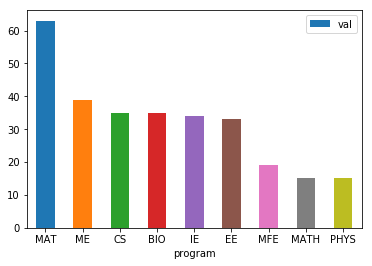

In [17]:
df = pd.DataFrame({'program':['MAT', 'ME', 'CS','BIO','IE','EE','MFE','MATH','PHYS'], 'val':[63, 39, 35,35,34,33,19,15,15]})
ax = df.plot.bar(x='program', y='val', rot=0)